In [55]:
!pip install numpy seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

sns.set_theme()

yash_ip = "10.104.168.213" # I (Yash) logged in

START_DATE = datetime.datetime(2024, 4, 23)

TIME_COL = "Time"
IP_COL = "IP"
DATE_COL = "Date"

In [43]:
def filter_date(df: pd.DataFrame):
    return df[df[TIME_COL].map(lambda dt: START_DATE < dt)]


def setup_df(df: pd.DataFrame):
    # Remove the rows where I logged in

    # Sort by time
    df = df[df[IP_COL] != yash_ip]
    df = df.sort_values(by=TIME_COL)
    df = df.reset_index(drop=True)

    # Add Date column
    df = df.copy()
    df[DATE_COL] = df[TIME_COL].map(lambda dt: dt.strftime("%m/%d"))

    return df

In [44]:
logins = pd.read_csv(
    "data/logins.txt", sep=";", names=[TIME_COL, IP_COL, "Session"], parse_dates=["Time"]
)
logins = filter_date(logins)
logins = setup_df(logins)
logins

,Time,IP,Session,Date
0,2024-04-23 00:57:18.914,179.43.180.108,f64c0cf0-012d-11ef-89d9-ef9c1dc5e411,04/23
1,2024-04-23 01:40:00.551,183.81.169.238,ed272460-0133-11ef-89d9-ef9c1dc5e411,04/23
2,2024-04-23 02:09:06.618,42.203.111.50,fde3d290-0137-11ef-89d9-ef9c1dc5e411,04/23
3,2024-04-23 03:12:19.503,183.81.169.238,d2a024e0-0140-11ef-89d9-ef9c1dc5e411,04/23
4,2024-04-23 05:28:38.390,170.64.214.38,dd9d4680-0153-11ef-8e48-bbd0010f6974,04/23
...,...,...,...,...
92,2024-04-30 14:18:13.680,161.35.185.20,020fd4e0-071e-11ef-abf8-05d8cbeee375,04/30
93,2024-04-30 14:22:44.881,161.35.185.20,a3b5f900-071e-11ef-abf8-05d8cbeee375,04/30
94,2024-04-30 14:27:17.447,161.35.185.20,462c3e60-071f-11ef-abf8-05d8cbeee375,04/30
95,2024-04-30 14:31:51.941,161.35.185.20,e9c8b440-071f-11ef-abf8-05d8cbeee375,04/30


In [45]:
login_attempts = pd.read_csv(
    "data/login_attempts.txt",
    sep=";",
    names=[TIME_COL, IP_COL, "method", "Name", "Password"],
    parse_dates=["Time"],
    # MITM doesn't wrap passwords with semicolons in them in quotes
    on_bad_lines=lambda lines: (
        lines[:-2] + [";".join(lines[-2:])] if len(lines) == 6 else lines
    ),
    engine="python",
)

login_attempts.drop("method", axis=1, inplace=True)

login_attempts["Name"] = login_attempts["Name"].apply(str)
login_attempts["Password"] = login_attempts["Password"].apply(str)

login_attempts = filter_date(login_attempts)
login_attempts = setup_df(login_attempts)

login_attempts

,Time,IP,Name,Password,Date
0,2024-04-23 00:01:12.087,220.179.241.68,root,power,04/23
1,2024-04-23 00:04:50.123,60.222.242.9,user,user2021,04/23
2,2024-04-23 00:11:32.759,183.81.169.238,root,0,04/23
3,2024-04-23 00:11:36.123,183.81.169.238,root,eve,04/23
4,2024-04-23 00:11:39.693,183.81.169.238,root,root,04/23
...,...,...,...,...,...
22866,2024-04-30 17:11:08.727,161.35.185.20,fahdp,fahdp,04/30
22867,2024-04-30 17:14:13.324,159.89.24.153,asrahma1,asrahma1,04/30
22868,2024-04-30 17:14:18.022,170.64.188.83,dev,dev,04/30
22869,2024-04-30 17:15:44.574,161.35.185.20,fanglanc,fanglanc,04/30


In [46]:
login_attempts["IP"].value_counts().nlargest(15)

IP
192.3.12.163      9501
180.97.220.14     1395
183.81.169.238     946
68.183.155.250     718
58.251.255.204     715
179.43.180.108     701
146.190.99.162     622
158.69.39.171      551
170.64.214.38      476
170.64.166.132     476
170.64.156.125     465
134.209.0.27       412
116.55.248.235     411
138.197.147.2      325
92.118.39.245      319
Name: count, dtype: int64

In [47]:
login_attempts["Name"].value_counts().nlargest(15)

Name
root        14810
admin        1002
user          514
ubuntu        370
debian        301
test          222
oracle        202
support       129
ftpuser        99
postgres       89
Antminer       87
guest          76
hadoop         75
vr             72
test2          60
Name: count, dtype: int64

In [48]:
login_attempts["Password"].value_counts().nlargest(15)

Password
123456      678
root        318
123         315
admin       307
1234        215
1           213
test        170
password    166
12345       162
12345678    158
0           137
ubuntu      122
eve         113
123123      103
admin1       94
Name: count, dtype: int64

In [49]:
(login_attempts["Name"].map(lambda n: n + " / ") + login_attempts["Password"]).value_counts().nlargest(15)

root / root        159
root / admin       134
root / 123456      128
root / 1           123
root / 123         123
root / 0           119
root / eve         112
root / 123123       99
admin / admin1      92
root / 12345        78
root / password     76
root / 1234         74
root / 12345678     73
root / test         71
root / 111111       69
Name: count, dtype: int64

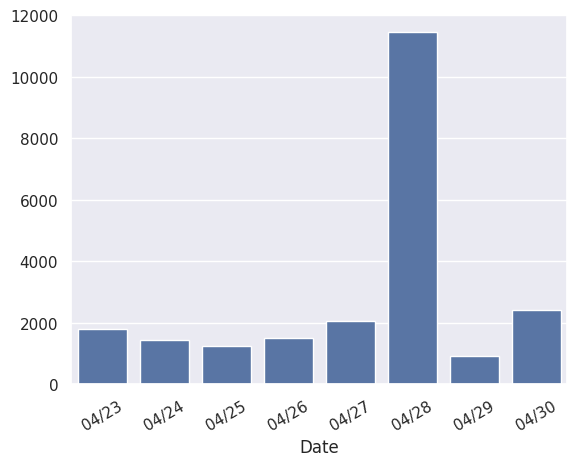

In [68]:
# Number of login attempts each day (not uniqued by IP)
by_day = login_attempts.groupby("Date").apply(lambda df: df["IP"].count(), include_groups=False)
g = sns.barplot(data=by_day)
g.set_xticks(g.get_xticks(), labels=g.get_xticklabels(), rotation=30);

<Axes: xlabel='Date'>

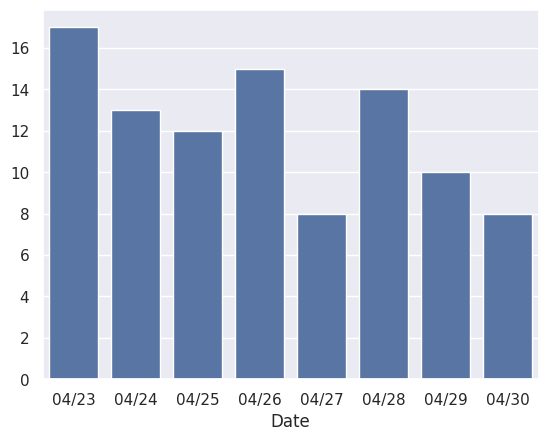

In [53]:
# Number of logins each day (not uniqued by IP)
by_day = logins.groupby("Date").apply(lambda df: df["IP"].count(), include_groups=False)
sns.barplot(data=by_day)

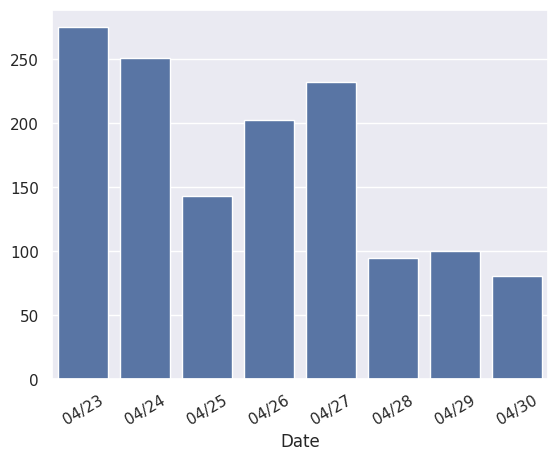

In [91]:
# Number of login attempts each day (uniqued by IP)
attempts_uniq_by_day = login_attempts.groupby(DATE_COL).apply(
    lambda df: df[IP_COL].drop_duplicates().count(), include_groups=False
)
g = sns.barplot(data=attempts_uniq_by_day)
g.set_xticks(g.get_xticks(), labels=g.get_xticklabels(), rotation=30);

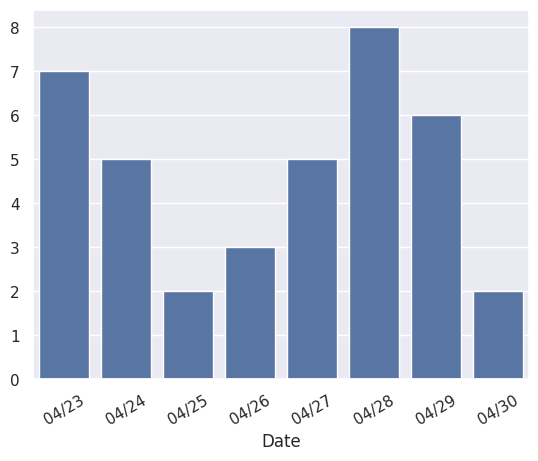

In [89]:
# Number of logins each day (uniqued by IP)
logins_uniq_by_day = logins.groupby(DATE_COL).apply(
    lambda df: df[IP_COL].drop_duplicates().count(), include_groups=False
)
g = sns.barplot(data=logins_uniq_by_day)
g.set_xticks(g.get_xticks(), labels=g.get_xticklabels(), rotation=30);

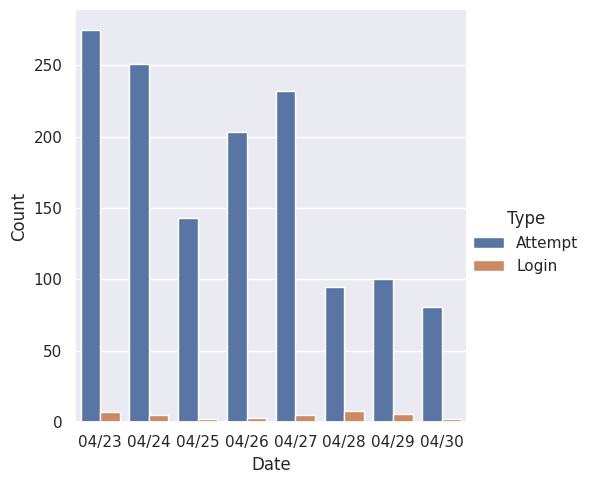

In [94]:
# Number of logins and login attempts each day (uniqued by IP)
both_uniq_by_day = pd.concat(
    [
        pd.DataFrame(
            {
                "Count": attempts_uniq_by_day,
                "Type": "Attempt",
            }
        ),
        pd.DataFrame(
            {
                "Count": logins_uniq_by_day,
                "Type": "Login",
            }
        ),
    ]
)

g = sns.catplot(data=both_uniq_by_day, kind="bar", x="Date", y="Count", hue="Type")
g.despine(left=True)

<Axes: xlabel='Time', ylabel='count'>

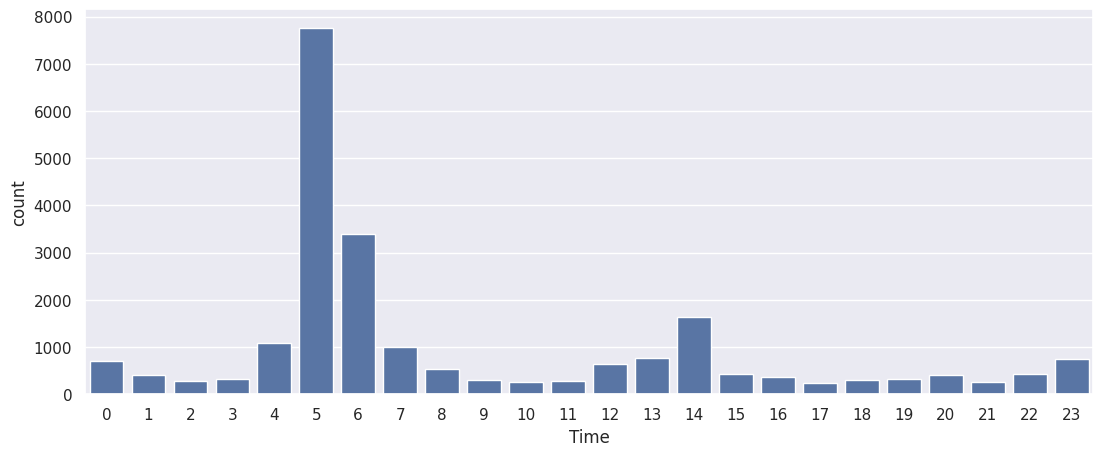

In [59]:
times_of_day = login_attempts[TIME_COL].apply(lambda dt: dt.hour)

plt.figure(figsize=(13, 5))
sns.barplot(data=times_of_day.value_counts())